<a href="https://colab.research.google.com/github/musiclip/practice_python/blob/main/20230829.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = pd.read_csv('tips.csv')

In [3]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [4]:
grouped = tips.groupby(['day','smoker'])

In [5]:
for i, group in grouped:
    print(i)

('Fri', 'No')
('Fri', 'Yes')
('Sat', 'No')
('Sat', 'Yes')
('Sun', 'No')
('Sun', 'Yes')
('Thur', 'No')
('Thur', 'Yes')


In [6]:
group

,total_bill,tip,smoker,day,time,size,tip_pct
80,19.44,3.00,Yes,Thur,Lunch,2,0.154321
83,32.68,5.00,Yes,Thur,Lunch,2,0.152999
138,16.00,2.00,Yes,Thur,Lunch,2,0.125000
191,19.81,4.19,Yes,Thur,Lunch,2,0.211509
192,28.44,2.56,Yes,Thur,Lunch,2,0.090014
193,15.48,2.02,Yes,Thur,Lunch,2,0.130491
194,16.58,4.00,Yes,Thur,Lunch,2,0.241255
196,10.34,2.00,Yes,Thur,Lunch,2,0.193424
197,43.11,5.00,Yes,Thur,Lunch,4,0.115982
198,13.00,2.00,Yes,Thur,Lunch,2,0.153846


In [7]:
type(group)

pandas.core.frame.DataFrame

In [8]:
gpd_pct = grouped['tip_pct']

In [9]:
gpd_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [10]:
gpd_pct.agg([('foo','mean'),('bar',np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [ ]:
for i, j in grouped['tip_pct','total_bill']:
    print(i, j)

In [12]:
func = ['count','mean','max']
result = grouped['tip_pct','total_bill'].agg(func)

<ipython-input-12-5f38d9b92a78>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['tip_pct','total_bill'].agg(func)


In [13]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [14]:
ftuples = [('평균','mean'),('차이',np.var)]

In [17]:
result = grouped['tip_pct','total_bill'].agg(ftuples)

<ipython-input-17-c200e158c490>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['tip_pct','total_bill'].agg(ftuples)


In [18]:
result

tip_pct           total_bill            
                   평균        차이         평균          차이
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

In [19]:
result['tip_pct']

평균        차이
day  smoker                    
Fri  No      0.151650  0.000791
     Yes     0.174783  0.002631
Sat  No      0.158048  0.001581
     Yes     0.147906  0.003767
Sun  No      0.160113  0.001793
     Yes     0.187250  0.023757
Thur No      0.160298  0.001503
     Yes     0.163863  0.001551

In [20]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [21]:
grouped.agg({'tip':np.max,'size':'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [22]:
grouped.agg({'tip_pct':['min','max','mean','std'], 'size': 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [23]:
tips.groupby(['day','smoker']).mean()

<ipython-input-23-b95a3bacdb03>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['day','smoker']).mean()


total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [25]:
tips.groupby(['day','smoker'], as_index = False).mean() #대칭 인덱스가 아닌 평행으로 보여줌

<ipython-input-25-4638cd6a9ef2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['day','smoker'], as_index = False).mean() #대칭 인덱스가 아닌 평행으로 보여줌


,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


In [26]:
def top(df, n = 5, column = 'tip_pct'):
    return df.sort_values(by = column)[-n:]

In [27]:
top(tips)

,total_bill,tip,smoker,day,time,size,tip_pct
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [28]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [30]:
tips.groupby(['smoker','day']).apply(top, n = 5, column = 'total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  99        12.46   1.50     No   Fri  Dinner     2  0.120385
            223       15.98   3.00     No   Fri   Lunch     3  0.187735
            91        22.49   3.50     No   Fri  Dinner     2  0.155625
            94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  39        31.27   5.00     No   Sat  Dinner     3  0.159898
            238       35.83   4.67     No   Sat  Dinner     3  0.130338
            23        39.42   7.58     No   Sat  Dinner     4  0.192288
            59        48.27   6.73     No   Sat  Dinner     4  0.139424
            212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  47        32.40   6.00     No   Sun  Dinner     4  0.185185
            52        34.81   5.20     No   Sun  Dinner     4  0.149382
            11        35.26   5.00     No   Sun  Dinner     4  0.141804
            112       38.07   4.00     No   Sun  Dinner     3  0.105070
            156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 77        27.20   4.00     No  Thur   Lunch     4  0.147059
            125       29.80   4.20     No  Thur   Lunch     6  0.140940
            141       34.30   6.70     No  Thur   Lunch     6  0.195335
            85        34.83   5.17     No  Thur   Lunch     4  0.148435
            142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  93        16.32   4.30    Yes   Fri  Dinner     2  0.263480
            98        21.01   3.00    Yes   Fri  Dinner     2  0.142789
            96        27.28   4.00    Yes   Fri  Dinner     2  0.146628
            90        28.97   3.00    Yes   Fri  Dinner     2  0.103555
            95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  237       32.83   1.17    Yes   Sat  Dinner     2  0.035638
            56        38.01   3.00    Yes   Sat  Dinner     4  0.078927
            207       38.73   3.00    Yes   Sat  Dinner     4  0.077459
            102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
            170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  175       32.90   3.11    Yes   Sun  Dinner     2  0.094529
            179       34.63   3.55    Yes   Sun  Dinner     2  0.102512
            180       34.65   3.68    Yes   Sun  Dinner     4  0.106205
            184       40.55   3.00    Yes   Sun  Dinner     2  0.073983
            182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 191       19.81   4.19    Yes  Thur   Lunch     2  0.211509
            204       20.53   4.00    Yes  Thur   Lunch     4  0.194837
            192       28.44   2.56    Yes  Thur   Lunch     2  0.090014
            83        32.68   5.00    Yes  Thur   Lunch     2  0.152999
            197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [33]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
 6   tip_pct     244 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 13.5+ KB


In [34]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [31]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [32]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [35]:
result.unstack()

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [36]:
s = pd.Series(np.random.randn(6))

In [37]:
s

0   -1.225732
1   -0.779767
2   -1.227589
3    2.392717
4    0.001159
5    0.676998
dtype: float64

In [38]:
s[::2] = np.nan

In [39]:
s

0         NaN
1   -0.779767
2         NaN
3    2.392717
4         NaN
5    0.676998
dtype: float64

In [40]:
s.fillna(s.mean())

0    0.763316
1   -0.779767
2    0.763316
3    2.392717
4    0.763316
5    0.676998
dtype: float64

In [41]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)

In [42]:
data

Ohio          0.088293
New York      0.639603
Vermont      -2.437349
Florida       0.481060
Oregon        1.334578
Nevada       -0.787506
California    0.045917
Idaho         0.510819
dtype: float64

In [43]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [45]:
data[['Vermont','Nevada','Idaho']] = np.nan

In [46]:
data

Ohio          0.088293
New York      0.639603
Vermont            NaN
Florida       0.481060
Oregon        1.334578
Nevada             NaN
California    0.045917
Idaho              NaN
dtype: float64

In [47]:
data.groupby(group_key).mean()

East    0.402985
West    0.690247
dtype: float64

In [48]:
fill_mean = lambda g: g.fillna(g.mean())

In [49]:
data.groupby(group_key).apply(fill_mean)

<ipython-input-49-2967b1959e8a>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data.groupby(group_key).apply(fill_mean)


Ohio          0.088293
New York      0.639603
Vermont       0.402985
Florida       0.481060
Oregon        1.334578
Nevada        0.690247
California    0.045917
Idaho         0.690247
dtype: float64

In [50]:
data.groupby(group_key, group_keys = True).apply(fill_mean)

East  Ohio          0.088293
      New York      0.639603
      Vermont       0.402985
      Florida       0.481060
West  Oregon        1.334578
      Nevada        0.690247
      California    0.045917
      Idaho         0.690247
dtype: float64

In [51]:
data.groupby(group_key, group_keys = False).apply(fill_mean)

Ohio          0.088293
New York      0.639603
Vermont       0.402985
Florida       0.481060
Oregon        1.334578
Nevada        0.690247
California    0.045917
Idaho         0.690247
dtype: float64

In [52]:
df = pd.DataFrame()

In [53]:
df

""


In [54]:
df['A'] = np.arange(5) * 10

In [55]:
df

,A
0,0
1,10
2,20
3,30
4,40


In [56]:
df['B'] = np.arange(5, 10) * 10
df['C'] = np.arange(10, 15) * 10

In [57]:
df

,A,B,C
0,0,50,100
1,10,60,110
2,20,70,120
3,30,80,130
4,40,90,140


In [58]:
df.apply(np.square)

,A,B,C
0,0,2500,10000
1,100,3600,12100
2,400,4900,14400
3,900,6400,16900
4,1600,8100,19600


In [59]:
df.apply(np.sum)

A    100
B    350
C    600
dtype: int64

In [60]:
df

,A,B,C
0,0,50,100
1,10,60,110
2,20,70,120
3,30,80,130
4,40,90,140


In [61]:
df.apply(np.sum, axis = 1)

0    150
1    180
2    210
3    240
4    270
dtype: int64

name

In [62]:
df.apply(lambda x: x/10 if x.name in ['A'] else x)

,A,B,C
0,0.0,50,100
1,1.0,60,110
2,2.0,70,120
3,3.0,80,130
4,4.0,90,140


In [79]:
df.apply(lambda x: x/10 if x.name in ['A','B'] else x)

,A,B,C
0,0.0,5.0,100
1,1.0,6.0,110
2,2.0,7.0,120
3,3.0,8.0,130
4,4.0,9.0,140


name : 들어오는 값의 칼럼 이름(axis =0) 혹은 인덱스 이름(axis= 1)

In [78]:
df.apply(lambda x: x/10 if x.name == 1 else x, axis = 1)

,A,B,C
0,0.0,50.0,100.0
1,1.0,6.0,11.0
2,20.0,70.0,120.0
3,30.0,80.0,130.0
4,40.0,90.0,140.0


In [74]:
df.apply(lambda x: x/10 if x.name %2 == 1 else x, axis = 1)

,A,B,C
0,0.0,50.0,100.0
1,1.0,6.0,11.0
2,20.0,70.0,120.0
3,3.0,8.0,13.0
4,40.0,90.0,140.0


In [83]:
df2 = df.copy()

In [84]:
df2

,A,B,C
0,0,50,100
1,10,60,110
2,20,70,120
3,30,80,130
4,40,90,140


In [85]:
df2.index = ['i','j','ks','1','m']

In [86]:
df2

,A,B,C
i,0,50,100
j,10,60,110
ks,20,70,120
1,30,80,130
m,40,90,140


In [87]:
df2.apply(lambda x: np.square(x))

,A,B,C
i,0,2500,10000
j,100,3600,12100
ks,400,4900,14400
1,900,6400,16900
m,1600,8100,19600


In [88]:
df2.apply(lambda x: np.square(x) if len(x.name) == 2 else x, axis = 1)

,A,B,C
i,0,50,100
j,10,60,110
ks,400,4900,14400
1,30,80,130
m,40,90,140


In [89]:
def my_sum(x,a,b):
    return a*x+b

In [90]:
df.apply(lambda x: my_sum(x, 3,2))

,A,B,C
0,2,152,302
1,32,182,332
2,62,212,362
3,92,242,392
4,122,272,422


In [91]:
dict_args = {'a':3,'b':2}
df.apply(my_sum, **dict_args)

,A,B,C
0,2,152,302
1,32,182,332
2,62,212,362
3,92,242,392
4,122,272,422


In [92]:
df.apply(my_sum, args = (3,2))

,A,B,C
0,2,152,302
1,32,182,332
2,62,212,362
3,92,242,392
4,122,272,422


In [93]:
fill_mean = lambda g: g.fillna(g.mean())

In [94]:
fill_values = {'East': 0.5, 'West': -1}

In [96]:
fill_func = lambda x: x.fillna(fill_values[x.name])  #name은 그룹

In [97]:
data

Ohio          0.088293
New York      0.639603
Vermont            NaN
Florida       0.481060
Oregon        1.334578
Nevada             NaN
California    0.045917
Idaho              NaN
dtype: float64

In [99]:
data.groupby(group_key, group_keys = True).apply(fill_func)

East  Ohio          0.088293
      New York      0.639603
      Vermont       0.500000
      Florida       0.481060
West  Oregon        1.334578
      Nevada       -1.000000
      California    0.045917
      Idaho        -1.000000
dtype: float64

In [102]:
suits = ['H','S','C','D']
card_val = (list(range(1,11))+[10]*3)*4
base_names = ['A'] + list(range(2,11)) + ['J','Q','K']

In [104]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']

In [105]:
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)

In [ ]:
cards

In [113]:
deck = pd.Series(card_val, index = cards)

In [114]:
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
QS     10
KS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
QC     10
KC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
QD     10
KD     10
dtype: int64

In [112]:
def draw(deck, n = 5):
    return deck.sample(n)  #sample: series에서 겹치지않고 n만큼 뽑기

In [115]:
draw(deck)

8D     8
QS    10
3D     3
JD    10
7S     7
dtype: int64

In [116]:
get_suit = lambda card : card[-1]
deck.groupby(get_suit).apply(lambda x : draw(x,2))

C  QC    10
   6C     6
D  9D     9
   2D     2
H  KH    10
   QH    10
S  AS     1
   9S     9
dtype: int64

gpd = df.groupby(lambda x: x)

In [119]:
deck.groupby(get_suit)

In [121]:
deck.groupby(get_suit).apply(draw, n=2)

C  4C      4
   10C    10
D  6D      6
   KD     10
H  JH     10
   KH     10
S  10S    10
   3S      3
dtype: int64

In [122]:
deck.groupby(get_suit, group_keys = False).apply(draw, n=2)

QC     10
10C    10
4D      4
10D    10
10H    10
4H      4
2S      2
QS     10
dtype: int64

In [ ]:
df1 = pd.read_excel('12_04_08_E_CCTV정보.xlsx')

In [ ]:
df1

In [138]:
df1 = df1[['관리기관명', '카메라대수']]

In [ ]:
df1

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
<ipython-input-234-9c61ed21dc2c>:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = data.pop_total[:, np.newaxis]


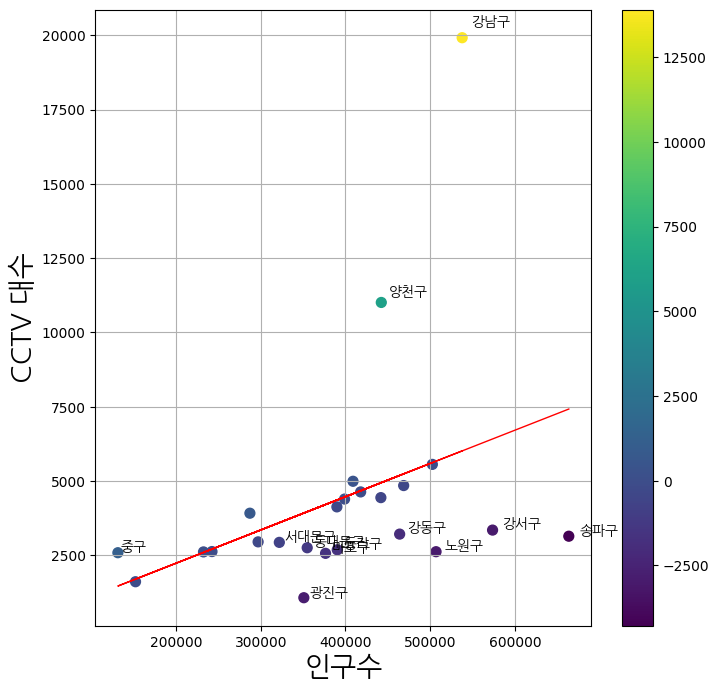

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

from matplotlib import font_manager
font_path = './NanumGothic.ttf'
fontprop = font_manager.FontProperties(fname = font_path, size = 20)

df1 = pd.read_excel('12_04_08_E_CCTV정보.xlsx')
df1 = df1[['관리기관명', '카메라대수']]
df1['구'] = df1['관리기관명'].str.replace('서울특별시 ', '').str.replace('청', '').str.replace('서울시 ','')
result = df1['카메라대수'].groupby(df1['구']).sum()
cctv_total = pd.DataFrame({'구': result.index, 'cctv_total': result.values})
cctv_total['구'] = cctv_total['구'].str.replace(' U-통합운영센터','')

file_pop = './POP_Seoul.csv'
pop_Seoul = pd.read_csv(file_pop, skiprows = [0,2], header = [0], encoding = 'utf8')
pop_data = pop_Seoul.loc[:, [pop_Seoul.columns[1], pop_Seoul.columns[3]]]
pop_data.rename(columns = {'동별(2)': '구', '계 (명)':'pop_total'}, inplace = True)

data = pd.merge(cctv_total, pop_data,on = '구')

x = data.pop_total[:, np.newaxis]
y = data.cctv_total
model = LinearRegression()
model.fit(x,y)
data['predict_lr'] = model.predict(x)
fp1 = np.polyfit(data.pop_total, data.cctv_total,1)
func = np.poly1d(fp1)
data['predict'] = func(data.pop_total)
data['res'] = data.cctv_total - data.predict_lr
data_sort = data.sort_values(by = 'res', ascending = False)
data_sort = data_sort.reset_index(drop = True)

plt.figure(figsize = (8,8))
plt.scatter(data_sort.pop_total, data_sort.cctv_total, c = data_sort.res, s = 50)
plt.plot(data_sort.pop_total, data_sort.predict_lr, ls = '-',lw = 1, color = 'red')

for n in range(3):
    plt.text(data_sort.loc[n, 'pop_total']*1.02, data_sort.loc[n, 'cctv_total']*1.02, data_sort.loc[n, '구'],fontsize = 10,fontproperties = fontprop)
for n in range(15, 24):
    plt.text(data_sort.loc[n, 'pop_total']*1.02, data_sort.loc[n, 'cctv_total']*1.02, data_sort.loc[n, '구'],fontsize = 10,fontproperties = fontprop)
plt.colorbar()
plt.grid()
plt.ylabel('CCTV 대수', fontproperties = fontprop)
plt.xlabel('인구수',fontproperties = fontprop)
plt.show()

In [229]:
df = pd.read_excel('12_04_08_E_CCTV정보.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

from matplotlib import font_manager
font_path = './NanumGothic.ttf'
fontprop = font_manager.FontProperties(fname = font_path, size = 20)

df1 = df.copy()
df1 = df1[['관리기관명','소재지도로명주소','카메라대수']]
df1['구'] = df1['관리기관명'].str.replace('서울특별시 ', '').str.replace('청', '').str.replace('서울시 ','')
result = df1['카메라대수'].groupby(df1['구']).sum()
cctv_total = pd.DataFrame({'구': result.index, 'cctv_total': result.values})
cctv_total['구'] = cctv_total['구'].str.replace(' U-통합운영센터','')
cctv_total #도봉이 강북으로 포함되어있음
total_cctv = cctv_total['cctv_total'].sum()
print("총 CCTV 대수:", total_cctv)

총 CCTV 대수: 104665


<ipython-input-232-53befa81dc55>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cctv_total = cctv_total.append(dobong_row, ignore_index=True)
<ipython-input-232-53befa81dc55>:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = data.pop_total[:, np.newaxis]


총 CCTV 대수: 104665


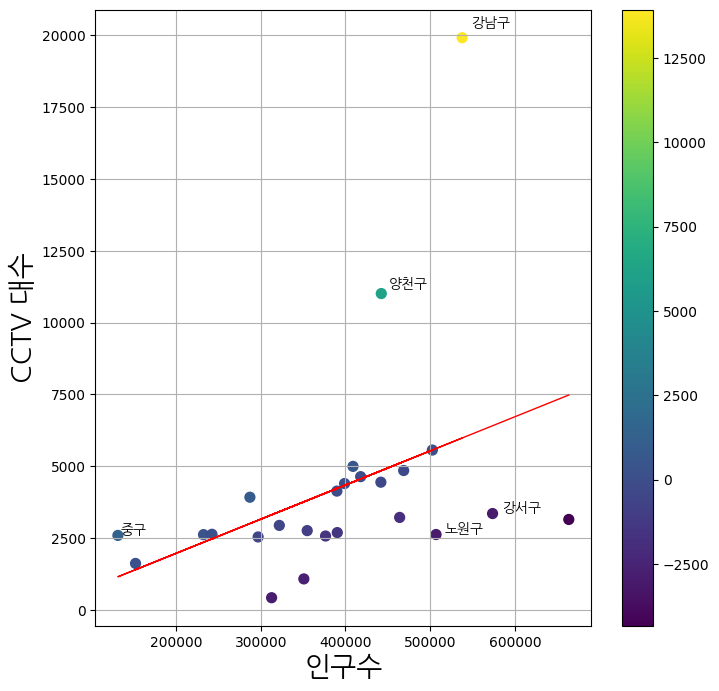

In [232]:
df1 = df.copy()
df1 = df1[['관리기관명','소재지도로명주소','카메라대수']]
df1['구'] = df1['관리기관명'].str.replace('서울특별시 ', '').str.replace('청', '').str.replace('서울시 ','')
dobong = df['소재지도로명주소'].str.contains('도봉', na=False)
dobong_cctv_total = df[dobong]['카메라대수'].sum()
dobong_cctv_total
dobong_row = {'구':'도봉구','cctv_total': dobong_cctv_total}
df1.drop(df1[df1['소재지도로명주소'].str.contains('도봉', na=False)].index, inplace=True)
result = df1['카메라대수'].groupby(df1['구']).sum()
cctv_total = pd.DataFrame({'구': result.index, 'cctv_total': result.values})
cctv_total['구'] = cctv_total['구'].str.replace(' U-통합운영센터','')
cctv_total = cctv_total.append(dobong_row, ignore_index=True)
total_cctv = cctv_total['cctv_total'].sum()
print("총 CCTV 대수:", total_cctv)
file_pop = './POP_Seoul.csv'
pop_Seoul = pd.read_csv(file_pop, skiprows = [0,2], header = [0], encoding = 'utf8')
pop_data = pop_Seoul.loc[:, [pop_Seoul.columns[1], pop_Seoul.columns[3]]]
pop_data.rename(columns = {'동별(2)': '구', '계 (명)':'pop_total'}, inplace = True)

data = pd.merge(cctv_total, pop_data,on = '구')

x = data.pop_total[:, np.newaxis]
y = data.cctv_total
model = LinearRegression()
model.fit(x,y)
data['predict_lr'] = model.predict(x)
fp1 = np.polyfit(data.pop_total, data.cctv_total,1)
func = np.poly1d(fp1)
data['predict'] = func(data.pop_total)
data['res'] = data.cctv_total - data.predict_lr
data_sort = data.sort_values(by = 'res', ascending = False)
data_sort = data_sort.reset_index(drop = True)

plt.figure(figsize = (8,8))
plt.scatter(data_sort.pop_total, data_sort.cctv_total, c = data_sort.res, s = 50)
plt.plot(data_sort.pop_total, data_sort.predict_lr, ls = '-',lw = 1, color = 'red')

for n in range(3):
    plt.text(data_sort.loc[n, 'pop_total']*1.02, data_sort.loc[n, 'cctv_total']*1.02, data_sort.loc[n, '구'],fontsize = 10,fontproperties = fontprop)
for n in range(22, 24):
    plt.text(data_sort.loc[n, 'pop_total']*1.02, data_sort.loc[n, 'cctv_total']*1.02, data_sort.loc[n, '구'],fontsize = 10,fontproperties = fontprop)
plt.colorbar()
plt.grid()
plt.ylabel('CCTV 대수', fontproperties = fontprop)
plt.xlabel('인구수',fontproperties = fontprop)
plt.show()

In [235]:
ls

12_04_08_E_CCTV정보.xlsx  POP_Seoul.csv  tips.csv
NanumGothic.ttf           sample_data/


In [236]:
cctv_data = pd.read_excel('12_04_08_E_CCTV정보.xlsx', engine = 'openpyxl')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [237]:
cctv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46761 entries, 0 to 46760
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   번호        46761 non-null  int64  
 1   관리기관명     46761 non-null  object 
 2   소재지도로명주소  42264 non-null  object 
 3   소재지지번주소   42705 non-null  object 
 4   설치목적구분    46761 non-null  object 
 5   카메라대수     46761 non-null  int64  
 6   카메라화소수    46637 non-null  float64
 7   촬영방면정보    24985 non-null  object 
 8   보관일수      46638 non-null  float64
 9   설치연월      29049 non-null  object 
 10  관리기관전화번호  46761 non-null  object 
 11  WGS84위도   46761 non-null  float64
 12  WGS84경도   46761 non-null  float64
 13  데이터기준일자   46761 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.0+ MB


In [239]:
cctv_df = cctv_data.iloc[:,[1,5]]

In [240]:
cctv_df.head()

,관리기관명,카메라대수
0,서울특별시 종로구청,1
1,서울특별시 종로구청,1
2,서울특별시 종로구청,1
3,서울특별시 종로구청,1
4,서울특별시 종로구청,1


In [241]:
cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46761 entries, 0 to 46760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관리기관명   46761 non-null  object
 1   카메라대수   46761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 730.8+ KB


In [242]:
cctv_df['관리기관명'].value_counts()

서울특별시 강남구청      6178
서울시 서초구청        4995
서울특별시 영등포구청     4397
서울특별시 양천구청      3417
서울특별시 강북구청      2957
서울특별시 노원구청      2626
서울특별시 은평구청      1789
서울특별시 성북구청      1781
서울특별시 구로구청      1779
서울특별시 관악구청      1753
서울특별시 강서구청      1666
서울특별시 성동구청      1314
서울특별시 송파구청      1244
서울특별시 중랑구청      1228
서울특별시 마포구청      1225
서울특별시 강동구청      1192
광진구청            1078
서울특별시 중구청       1026
서울특별시 동대문구청      976
서울특별시 동작구청       890
서울특별시 서대문구청      867
서울특별시 용산구청       808
서울특별시 종로구청       797
금천구 U-통합운영센터     778
Name: 관리기관명, dtype: int64

In [243]:
cctv_df[cctv_df['카메라대수']>1]

,관리기관명,카메라대수
72,서울특별시 종로구청,3
73,서울특별시 종로구청,3
74,서울특별시 종로구청,3
75,서울특별시 종로구청,3
76,서울특별시 종로구청,3
...,...,...
46399,서울특별시 강서구청,3
46400,서울특별시 강서구청,3
46410,서울특별시 강서구청,2
46412,서울특별시 강서구청,2


In [244]:
mask = cctv_df.관리기관명.str.contains('도봉')

In [245]:
cctv_df[mask]

,관리기관명,카메라대수


In [259]:
df_c = cctv_df.replace({'관리기관명':'서울시 서초구청'}, '서울특별시 서초구청')

In [260]:
df_c['관리기관명'].value_counts()

서울특별시 강남구청      6178
서울특별시 서초구청      4995
서울특별시 영등포구청     4397
서울특별시 양천구청      3417
서울특별시 강북구청      2957
서울특별시 노원구청      2626
서울특별시 은평구청      1789
서울특별시 성북구청      1781
서울특별시 구로구청      1779
서울특별시 관악구청      1753
서울특별시 강서구청      1666
서울특별시 성동구청      1314
서울특별시 송파구청      1244
서울특별시 중랑구청      1228
서울특별시 마포구청      1225
서울특별시 강동구청      1192
광진구청            1078
서울특별시 중구청       1026
서울특별시 동대문구청      976
서울특별시 동작구청       890
서울특별시 서대문구청      867
서울특별시 용산구청       808
서울특별시 종로구청       797
금천구 U-통합운영센터     778
Name: 관리기관명, dtype: int64

In [261]:
df_c = df_c.replace({'관리기관명':'광진구청'}, '서울특별시 광진구청')

In [262]:
df_c['관리기관명'].value_counts()

서울특별시 강남구청      6178
서울특별시 서초구청      4995
서울특별시 영등포구청     4397
서울특별시 양천구청      3417
서울특별시 강북구청      2957
서울특별시 노원구청      2626
서울특별시 은평구청      1789
서울특별시 성북구청      1781
서울특별시 구로구청      1779
서울특별시 관악구청      1753
서울특별시 강서구청      1666
서울특별시 성동구청      1314
서울특별시 송파구청      1244
서울특별시 중랑구청      1228
서울특별시 마포구청      1225
서울특별시 강동구청      1192
서울특별시 광진구청      1078
서울특별시 중구청       1026
서울특별시 동대문구청      976
서울특별시 동작구청       890
서울특별시 서대문구청      867
서울특별시 용산구청       808
서울특별시 종로구청       797
금천구 U-통합운영센터     778
Name: 관리기관명, dtype: int64

In [263]:
df_c = df_c.replace({'관리기관명':'금천구 U-통합운영센터'}, '서울특별시 금천구청')

In [264]:
df_c['관리기관명'].value_counts()

서울특별시 강남구청     6178
서울특별시 서초구청     4995
서울특별시 영등포구청    4397
서울특별시 양천구청     3417
서울특별시 강북구청     2957
서울특별시 노원구청     2626
서울특별시 은평구청     1789
서울특별시 성북구청     1781
서울특별시 구로구청     1779
서울특별시 관악구청     1753
서울특별시 강서구청     1666
서울특별시 성동구청     1314
서울특별시 송파구청     1244
서울특별시 중랑구청     1228
서울특별시 마포구청     1225
서울특별시 강동구청     1192
서울특별시 광진구청     1078
서울특별시 중구청      1026
서울특별시 동대문구청     976
서울특별시 동작구청      890
서울특별시 서대문구청     867
서울특별시 용산구청      808
서울특별시 종로구청      797
서울특별시 금천구청      778
Name: 관리기관명, dtype: int64

In [265]:
df_c.columns = ['office','cctv']

In [266]:
df_c

,office,cctv
0,서울특별시 종로구청,1
1,서울특별시 종로구청,1
2,서울특별시 종로구청,1
3,서울특별시 종로구청,1
4,서울특별시 종로구청,1
...,...,...
46756,서울특별시 노원구청,1
46757,서울특별시 노원구청,1
46758,서울특별시 노원구청,1
46759,서울특별시 노원구청,1


In [267]:
df_c['gu'] = df_c.office.str.replace('서울특별시 ','').str.replace('청','')

In [271]:
df_c['gu'] = df_c.office.apply(lambda x: x[6:-1])

In [272]:
df_c

,office,cctv,gu
0,서울특별시 종로구청,1,종로구
1,서울특별시 종로구청,1,종로구
2,서울특별시 종로구청,1,종로구
3,서울특별시 종로구청,1,종로구
4,서울특별시 종로구청,1,종로구
...,...,...,...
46756,서울특별시 노원구청,1,노원구
46757,서울특별시 노원구청,1,노원구
46758,서울특별시 노원구청,1,노원구
46759,서울특별시 노원구청,1,노원구


In [273]:
df_c.gu.value_counts()

강남구     6178
서초구     4995
영등포구    4397
양천구     3417
강북구     2957
노원구     2626
은평구     1789
성북구     1781
구로구     1779
관악구     1753
강서구     1666
성동구     1314
송파구     1244
중랑구     1228
마포구     1225
강동구     1192
광진구     1078
중구      1026
동대문구     976
동작구      890
서대문구     867
용산구      808
종로구      797
금천구      778
Name: gu, dtype: int64

In [274]:
df_cctv = df_c.cctv.groupby(df_c.gu).sum()

In [277]:
cctv_data = df_cctv.reset_index()

In [278]:
cctv_data

,gu,cctv
0,강남구,19915
1,강동구,3218
2,강북구,2957
3,강서구,3353
4,관악구,5563
5,광진구,1078
6,구로구,4637
7,금천구,2631
8,노원구,2626
9,동대문구,2759


<ipython-input-284-74e12e7e46d5>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = data.pop_total[:, np.newaxis]


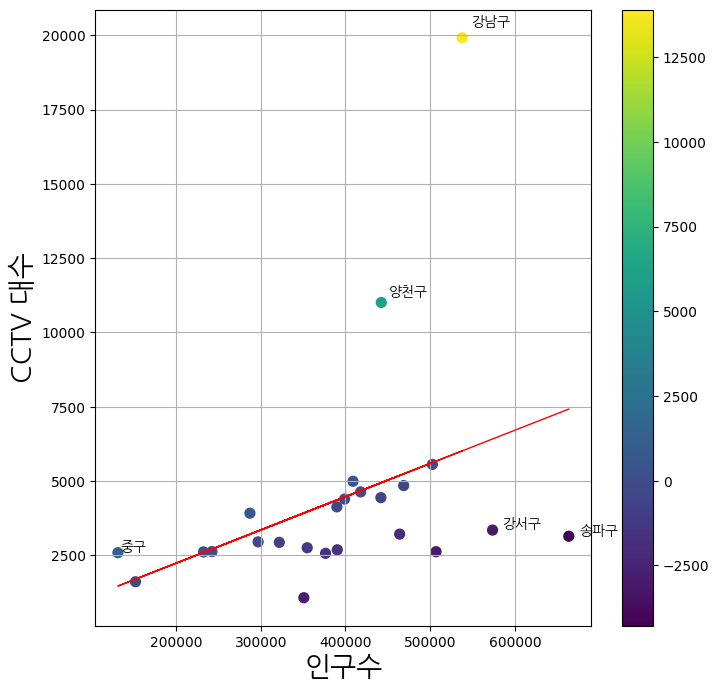

In [284]:
file_pop = './POP_Seoul.csv'
pop_Seoul = pd.read_csv(file_pop, skiprows = [0,2], header = [0], encoding = 'utf8')
pop_data = pop_Seoul.loc[:, [pop_Seoul.columns[1], pop_Seoul.columns[3]]]
pop_data.rename(columns = {'동별(2)': 'gu', '계 (명)':'pop_total'}, inplace = True)

data = pd.merge(cctv_data, pop_data,on = 'gu')

x = data.pop_total[:, np.newaxis]
y = data.cctv
model = LinearRegression()
model.fit(x,y)
data['predict_lr'] = model.predict(x)
fp1 = np.polyfit(data.pop_total, data.cctv,1)
func = np.poly1d(fp1)
data['predict'] = func(data.pop_total)
data['res'] = data.cctv - data.predict_lr
data_sort = data.sort_values(by = 'res', ascending = False)
data_sort = data_sort.reset_index(drop = True)

plt.figure(figsize = (8,8))
plt.scatter(data_sort.pop_total, data_sort.cctv, c = data_sort.res, s = 50)
plt.plot(data_sort.pop_total, data_sort.predict_lr, ls = '-',lw = 1, color = 'red')

for n in range(3):
    plt.text(data_sort.loc[n, 'pop_total']*1.02, data_sort.loc[n, 'cctv']*1.02, data_sort.loc[n, 'gu'],fontsize = 10,fontproperties = fontprop)
for n in range(22, 24):
    plt.text(data_sort.loc[n, 'pop_total']*1.02, data_sort.loc[n, 'cctv']*1.02, data_sort.loc[n, 'gu'],fontsize = 10,fontproperties = fontprop)
plt.colorbar()
plt.grid()
plt.ylabel('CCTV 대수', fontproperties = fontprop)
plt.xlabel('인구수',fontproperties = fontprop)
plt.show()

In [285]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])

In [286]:
df.agg(['sum','min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [287]:
df.agg({'A':['sum','min'], 'B':['min','max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [289]:
df.agg(x = ('A','max'), y = ('B','min'), z = ('C', np.mean))

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,6.0


In [290]:
df = pd.DataFrame({
    'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]})

In [291]:
df

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4
4,서울,apple,150,5
5,서울,apple,200,6
6,서울,banana,400,7


In [292]:
df.groupby('city').mean()

<ipython-input-292-1de92c00fe84>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('city').mean()


,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [293]:
df.groupby('city').get_group('부산')

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4


In [297]:
df.groupby(['city','fruits'], as_index = False).apply(lambda d:(d.price * d.quantity).sum())

,city,fruits,None
0,부산,apple,100
1,부산,banana,1950
2,부산,orange,400
3,서울,apple,1950
4,서울,banana,2800


In [298]:
from datetime import datetime

In [299]:
now = datetime.now()

In [300]:
now

datetime.datetime(2023, 8, 29, 7, 6, 15, 760649)

In [306]:
now.hour + 9

16

In [304]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [305]:
delta

datetime.timedelta(days=926, seconds=56700)

In [307]:
from datetime import timedelta

In [308]:
start = datetime(2023, 8, 29)
start + timedelta(7)

datetime.datetime(2023, 9, 5, 0, 0)

In [309]:
start - 2 * timedelta(12)

datetime.datetime(2023, 8, 5, 0, 0)

In [310]:
stamp = datetime(2023, 8, 29)

In [312]:
stamp

datetime.datetime(2023, 8, 29, 0, 0)

In [315]:
value = str(stamp)

In [314]:
stamp.strftime('%Y====%m====%d')

'2023====08====29'

In [316]:
value

'2023-08-29 00:00:00'

In [321]:
datetime.strptime(value[:10], '%Y-%m-%d')

datetime.datetime(2023, 8, 29, 0, 0)

In [322]:
from dateutil.parser import parse

In [323]:
parse('2023-08-29')

datetime.datetime(2023, 8, 29, 0, 0)

In [324]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [325]:
datestrs = ['2023-07-06 12:00:00', '2023-08-06 00:00:00']

In [326]:
datestrs

['2023-07-06 12:00:00', '2023-08-06 00:00:00']

In [327]:
pd.to_datetime(datestrs)

DatetimeIndex(['2023-07-06 12:00:00', '2023-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [328]:
idx = pd.to_datetime(datestrs + [None])

In [329]:
datestrs + [None]

['2023-07-06 12:00:00', '2023-08-06 00:00:00', None]

In [330]:
idx

DatetimeIndex(['2023-07-06 12:00:00', '2023-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [331]:
idx[2]

NaT

In [332]:
pd.isnull(idx)

array([False, False,  True])

In [335]:
dates = [datetime(2023, 1, 2),datetime(2023, 1, 5),
         datetime(2023, 1, 7),datetime(2023, 1, 8),
         datetime(2023, 1, 10),datetime(2023, 1, 12)]

In [336]:
ts = pd.Series(np.random.randn(6), index = dates)

In [337]:
ts

2023-01-02    1.902568
2023-01-05    2.017997
2023-01-07   -0.025002
2023-01-08    0.945262
2023-01-10    0.446663
2023-01-12   -0.787541
dtype: float64

In [338]:
ts.index

DatetimeIndex(['2023-01-02', '2023-01-05', '2023-01-07', '2023-01-08',
               '2023-01-10', '2023-01-12'],
              dtype='datetime64[ns]', freq=None)

In [340]:
ts[::2]

2023-01-02    1.902568
2023-01-07   -0.025002
2023-01-10    0.446663
dtype: float64

In [341]:
ts + ts[::2]   #안더해진 것들은 nan

2023-01-02    3.805137
2023-01-05         NaN
2023-01-07   -0.050004
2023-01-08         NaN
2023-01-10    0.893326
2023-01-12         NaN
dtype: float64

In [342]:
stamp = ts.index[2]

In [343]:
stamp

Timestamp('2023-01-07 00:00:00')

In [344]:
ts[stamp]

-0.025002150935521456

In [345]:
ts

2023-01-02    1.902568
2023-01-05    2.017997
2023-01-07   -0.025002
2023-01-08    0.945262
2023-01-10    0.446663
2023-01-12   -0.787541
dtype: float64

In [346]:
ts['1/10/2023']

0.446663157671176

In [348]:
ts['20230112']

-0.7875410760897336

In [350]:
longer_ts = pd.Series(np.random.randn(1000),
                      index = pd.date_range('1/1/2023',
                                            periods = 1000))

In [351]:
longer_ts

2023-01-01   -1.139563
2023-01-02    0.072225
2023-01-03   -0.800654
2023-01-04   -0.343029
2023-01-05   -1.446966
                ...   
2025-09-22   -0.350922
2025-09-23    0.489969
2025-09-24    2.398015
2025-09-25   -0.376500
2025-09-26    0.497415
Freq: D, Length: 1000, dtype: float64

In [352]:
longer_ts['2024']

2024-01-01   -1.777615
2024-01-02    1.120378
2024-01-03    0.291955
2024-01-04   -0.675799
2024-01-05   -0.059360
                ...   
2024-12-27   -1.796956
2024-12-28    1.459883
2024-12-29    0.809177
2024-12-30   -0.193847
2024-12-31   -0.580924
Freq: D, Length: 366, dtype: float64

In [356]:
longer_ts['2024-08']

2024-08-01    0.888906
2024-08-02   -1.609650
2024-08-03   -0.435708
2024-08-04    0.493948
2024-08-05   -0.754228
2024-08-06    1.013093
2024-08-07    2.442851
2024-08-08    2.358959
2024-08-09   -1.426981
2024-08-10   -1.139411
2024-08-11   -1.251898
2024-08-12    0.375309
2024-08-13   -0.620057
2024-08-14   -0.259625
2024-08-15    0.661494
2024-08-16   -0.223432
2024-08-17    0.386470
2024-08-18   -1.024937
2024-08-19    0.912174
2024-08-20   -0.205919
2024-08-21   -0.913038
2024-08-22   -0.334129
2024-08-23    1.010299
2024-08-24    0.854589
2024-08-25    0.294623
2024-08-26    2.249765
2024-08-27   -0.046995
2024-08-28   -0.660663
2024-08-29   -1.630555
2024-08-30    0.688826
2024-08-31   -0.119436
Freq: D, dtype: float64

In [357]:
longer_ts

2023-01-01   -1.139563
2023-01-02    0.072225
2023-01-03   -0.800654
2023-01-04   -0.343029
2023-01-05   -1.446966
                ...   
2025-09-22   -0.350922
2025-09-23    0.489969
2025-09-24    2.398015
2025-09-25   -0.376500
2025-09-26    0.497415
Freq: D, Length: 1000, dtype: float64

In [358]:
longer_ts[datetime(2025, 9, 22):]

2025-09-22   -0.350922
2025-09-23    0.489969
2025-09-24    2.398015
2025-09-25   -0.376500
2025-09-26    0.497415
Freq: D, dtype: float64

In [359]:
longer_ts['2/3/2024':'1/1/2025']

2024-02-03    0.417491
2024-02-04   -0.362367
2024-02-05   -0.739953
2024-02-06   -1.906617
2024-02-07   -1.183309
                ...   
2024-12-28    1.459883
2024-12-29    0.809177
2024-12-30   -0.193847
2024-12-31   -0.580924
2025-01-01    1.954090
Freq: D, Length: 334, dtype: float64

In [360]:
longer_ts.truncate(after = '8/9/2023')

2023-01-01   -1.139563
2023-01-02    0.072225
2023-01-03   -0.800654
2023-01-04   -0.343029
2023-01-05   -1.446966
                ...   
2023-08-05    0.527091
2023-08-06   -0.584100
2023-08-07    0.920665
2023-08-08    0.384471
2023-08-09    0.197620
Freq: D, Length: 221, dtype: float64

In [362]:
dates = pd.date_range('1/1/2023', periods = 100, freq = 'W-WED')

In [363]:
dates

DatetimeIndex(['2023-01-04', '2023-01-11', '2023-01-18', '2023-01-25',
               '2023-02-01', '2023-02-08', '2023-02-15', '2023-02-22',
               '2023-03-01', '2023-03-08', '2023-03-15', '2023-03-22',
               '2023-03-29', '2023-04-05', '2023-04-12', '2023-04-19',
               '2023-04-26', '2023-05-03', '2023-05-10', '2023-05-17',
               '2023-05-24', '2023-05-31', '2023-06-07', '2023-06-14',
               '2023-06-21', '2023-06-28', '2023-07-05', '2023-07-12',
               '2023-07-19', '2023-07-26', '2023-08-02', '2023-08-09',
               '2023-08-16', '2023-08-23', '2023-08-30', '2023-09-06',
               '2023-09-13', '2023-09-20', '2023-09-27', '2023-10-04',
               '2023-10-11', '2023-10-18', '2023-10-25', '2023-11-01',
               '2023-11-08', '2023-11-15', '2023-11-22', '2023-11-29',
               '2023-12-06', '2023-12-13', '2023-12-20', '2023-12-27',
               '2024-01-03', '2024-01-10', '2024-01-17', '2024-01-24',
      

freq 에 사용할수있는 것들

https://pandas.pydata.org/pandas-docs/version/0.9.1/timeseries.html

s: 초

T: 분

H: 시간

D: 일(day)

B: 주말이 아닌 평일

W: 주(일요일)

W-MON: 주(월요일)

M: 각 달(month)의 마지막 날

MS: 각 달의 첫날

BM: 주말이 아닌 평일 중에서 각 달의 마지막 날

BMS: 주말이 아닌 평일 중에서 각 달의 첫날

WOM-2THU: 각 달의 두번째 목요일

Q-JAN: 각 분기의 첫달의 마지막 날

Q-DEC: 각 분기의 마지막 달의 마지막 날

In [365]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index = dates,
                       columns = ['A','B','C','D'])

In [366]:
long_df

,A,B,C,D
2023-01-04,-2.505675,0.760049,-0.572666,0.463752
2023-01-11,0.560782,-1.419095,-0.982362,-0.775875
2023-01-18,-1.012512,-0.494113,-1.517516,-0.103089
2023-01-25,0.750439,-1.669814,0.338788,0.336810
2023-02-01,1.021078,-1.329913,-1.455149,-1.393477
...,...,...,...,...
2024-10-30,0.177511,-0.309823,0.012610,1.454657
2024-11-06,-1.067291,0.865878,-1.019924,-1.142914
2024-11-13,0.264622,0.431577,-0.278970,-1.055103
2024-11-20,0.667436,0.993565,-0.009062,0.792730


In [367]:
long_df.loc['8-2023']

,A,B,C,D
2023-08-02,1.013282,0.322583,0.668163,0.317769
2023-08-09,-1.288160,-0.511732,1.343259,-0.022440
2023-08-16,0.687761,0.153873,0.438508,0.330639
2023-08-23,-1.939176,0.336616,1.474186,-0.680483
2023-08-30,0.770528,-0.943189,-0.281653,0.420763


In [368]:
dates = pd.DatetimeIndex(['1/1/2023','1/2/2023', '1/2/2023','1/2/2023',
                          '1/3/2023'])

In [369]:
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-02', '2023-01-02',
               '2023-01-03'],
              dtype='datetime64[ns]', freq=None)

In [370]:
dup_ts = pd.Series(np.arange(5), index = dates)

In [371]:
dup_ts

2023-01-01    0
2023-01-02    1
2023-01-02    2
2023-01-02    3
2023-01-03    4
dtype: int64

In [372]:
dup_ts.index.is_unique

False

In [373]:
dup_ts['1/2/2023']

2023-01-02    1
2023-01-02    2
2023-01-02    3
dtype: int64

In [374]:
dup_ts['1/3/2023']

4

In [375]:
grouped = dup_ts.groupby(level = 0).sum()

In [376]:
grouped

2023-01-01    0
2023-01-02    6
2023-01-03    4
dtype: int64